In [1]:
import random
import matplotlib.pyplot as plt
import math

In [2]:
pages_links = {
    'wikipedia': ['youtube', 'facebook', 'khan'],
    'facebook': ['youtube', 'instagram', 'wikipedia'],
    'youtube': ['facebook', 'github', 'khan', 'freecodecamp'],
    'instagram': ['facebook', 'freecodecamp'],
    'github': ['freecodecamp', 'khan', 'wikipedia'],
    'freecodecamp': ['khan', 'github', 'youtube'],
    'khan': ['wikipedia', 'facebook'],
}

to make it more easy to sea what are the most popular and least popular pages:

In [3]:
def bubble_sort_dict(dict_to_sort: dict) -> dict:
    dict_items = list(dict_to_sort.items())
    for i in range(len(dict_items)):
        for j in range(len(dict_items) - 1):
            if dict_items[j][1] > dict_items[j + 1][1]:
                dict_items[j], dict_items[j + 1] = dict_items[j + 1], dict_items[j]
    return dict(dict_items)

simulator that rank the pages:

In [4]:
def rank_pages_simulator(pages_links: dict) -> dict:
    pages_entrances = {page: 0 for page in pages_links}
    current_page = random.choice(list(pages_links.keys()))
    for i in range(len(pages_links) * 10**4):
        try:
            current_page = random.choice(pages_links[current_page])
            pages_entrances[current_page] += 1/(len(pages_links) * 10**2)
        except:
            current_page = random.choice(list(pages_links.keys()))
    pages_entrances = {page: round(pages_entrances[page], 2) for page in pages_entrances}
    pages_entrances = bubble_sort_dict(pages_entrances)
    return pages_entrances

In [5]:
rank_pages_simulator(pages_links)

{'instagram': 7.3,
 'github': 7.78,
 'freecodecamp': 10.62,
 'khan': 16.54,
 'youtube': 17.23,
 'wikipedia': 18.39,
 'facebook': 22.15}

function that chart the pages ranking:

In [6]:
def chart_pages_ranking(pages_entrances: dict):
    websites = list(pages_entrances.keys())
    entrances = list(pages_entrances.values())
    plt.bar(websites, entrances, color ='maroon',width = 0.4)
 
    plt.xlabel('websites')
    plt.ylabel("No. of entrances to website")
    plt.show()

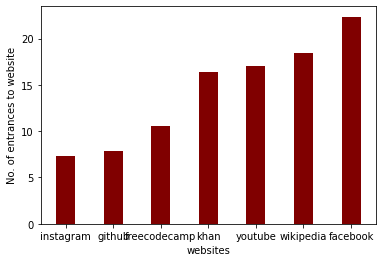

In [7]:
chart_pages_ranking(rank_pages_simulator(pages_links))

to get the websites that pointing to the website

In [8]:
def pages_degs_in(pages_links: dict) -> dict:
    pages_degs_in = {page: [] for page in pages_links}
    for page in pages_links:
        for link_page in pages_links[page]:
            pages_degs_in[link_page].append(page)
    return pages_degs_in

In [9]:
pages_degs_in(pages_links)

{'wikipedia': ['facebook', 'github', 'khan'],
 'facebook': ['wikipedia', 'youtube', 'instagram', 'khan'],
 'youtube': ['wikipedia', 'facebook', 'freecodecamp'],
 'instagram': ['facebook'],
 'github': ['youtube', 'freecodecamp'],
 'freecodecamp': ['youtube', 'instagram', 'github'],
 'khan': ['wikipedia', 'youtube', 'github', 'freecodecamp']}

the best algorithm i could think of: <br>
<ol>
 <li> given the amount of deg-in and deg-out of a page. the <b>page value</b> will be <b>deg-in / deg-out</b>. </li>
 <li> the page popularity will be the <b>sum</b> of the <b>pages values</b> that <b>link</b> to him. </li>
</ol>
the algorithm is not so accurate but its the best I could.

In [10]:
def my_rank_pages_algorithm(pages_links: dict) -> dict:    
    pages_values = {page: len(pages_degs_in(pages_links)[page]) / len(pages_links[page]) for page in pages_links}
    pages_popularity = {page: 0 for page in pages_links}
    for page in pages_links:
        for link_page in pages_links[page]:
            pages_popularity[link_page] += pages_values[page]
    pages_popularity = bubble_sort_dict(pages_popularity)
    return pages_popularity

In [11]:
my_rank_pages_algorithm(pages_links)

{'instagram': 1.3333333333333333,
 'github': 1.75,
 'freecodecamp': 1.9166666666666665,
 'youtube': 3.333333333333333,
 'khan': 3.4166666666666665,
 'wikipedia': 4.0,
 'facebook': 4.25}

After that I saw this <a href="https://www.youtube.com/watch?v=P8Kt6Abq_rM">video</a> and implement the algorithm in code. <br>
This algorithm is really accurate according to my simulator

In [12]:
def working_algorithm(pages_links: dict) -> dict:
    links_to_page = pages_degs_in(pages_links)
    pages_popularity = {page: 1/len(pages_links) for page in pages_links}
    holder = {page: 0 for page in pages_links}
    for i in range(10**4):
        for page in links_to_page:
            for deg_in in links_to_page[page]:
                holder[page] += pages_popularity[deg_in]/len(pages_links[deg_in])
        pages_popularity = {page: holder[page] for page in holder}
        holder = {page: 0 for page in pages_links}
    pages_popularity = bubble_sort_dict(pages_popularity)
    pages_popularity = {page: round(pages_popularity[page], 4) * 100 for page in pages_popularity}
    return pages_popularity

In [13]:
working_algorithm(pages_links)

{'instagram': 7.4399999999999995,
 'github': 7.8,
 'freecodecamp': 10.59,
 'khan': 16.49,
 'youtube': 17.07,
 'wikipedia': 18.29,
 'facebook': 22.33}

In [17]:
from bs4 import BeautifulSoup
import requests

In [18]:
def scrape_links(website):
    website_connectios = []
    res = requests.get(website)
    soup = BeautifulSoup(res.text, 'html')
    for link in soup.find_all('a', href=True):
        if link['href'][:5] == 'https' and link['href'][-4:] != '.jpg': 
            website_connectios.append(link['href'])
    return website_connectios

In [19]:
def websites_crawler(start_website):
    websites_graph = {start_website: scrape_links(start_website)}
    next_webs = scrape_links(start_website)[:5]
    checked_web = [start_website]
    for x in range(10):
        next_next_webs = [];
        for web in next_webs:
            if web not in checked_web:
                checked_web.append(web)
                websites_graph[web] = scrape_links(web)
            for next_links in scrape_links(web):
                    next_next_webs.append(next_links)
        next_webs = next_next_webs[:5]
    return websites_graph

In [ ]:
k = websites_crawler('https://he.wikipedia.org/wiki/%D7%9E%D7%93%D7%A2%D7%99_%D7%94%D7%9E%D7%97%D7%A9%D7%91')

In [ ]:
woking_algorithm(k)

In [ ]:
chart_pages_ranking(working_algorithm(k))

In [ ]:
print('done')